In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

from tqdm import tqdm
import os
import gc

In [3]:
def get_net_set(net1):

    if not os.path.exists(net1):
        return None

    net1_set = set()
    with open(net1, 'r') as f:
        lines = f.read().splitlines()
	# print([net1, net2])
    for line in lines:
        sender, recivier, weight = line.split('##')
        net1_set.add((sender, recivier))
    
    return net1_set


In [4]:
def network_set_shuffle(net_set):
    
    shuf_set = list(net_set)
    for i in range(20):
        new_net_set = set()
        while len(shuf_set)>1:

            tup1 = random.choice(shuf_set)
            shuf_set.remove(tup1)
            tup2 = random.choice(shuf_set)
            count = 0
            while tup2[1]==tup1[0] or tup1[1]==tup2[0]:
                count+=1
                if len(shuf_set)<=2: break
                tup2 = random.choice(shuf_set)
                if count>100: break
            shuf_set.remove(tup2)
            if tup2[1]==tup1[0] or tup1[1]==tup2[0]:
                new_net_set.add(tup1)
                new_net_set.add(tup2)
                break
            else:
                new_net_set.add((tup2[0],tup1[1]))
                new_net_set.add((tup1[0],tup2[1]))
                
        for tup in shuf_set:
            new_net_set.add(tup)
        shuf_set = list(new_net_set)
    
    return set(shuf_set)



In [5]:
def sets_jaccard_unweighted(net1_set, net2_set):
    intersection_edges = net1_set.intersection(net2_set)
    return len(intersection_edges) / (len(net1_set) + len(net2_set)-len(intersection_edges))

def sets_overlap_unweighted(net1_set, net2_set):
    intersection_edges = net1_set.intersection(net2_set)
    return len(intersection_edges) / min([len(net1_set), len(net2_set)])

In [6]:
time_resolution = '2week'

## One Month

In [7]:
c_path = '../network_data'+time_resolution+'/commits/'
e_path = '../network_data'+time_resolution+'/emails/'

all_graduated_name = np.load('../all_graduated.npy').tolist()
all_graduated = [x.lower() for x in all_graduated_name]
all_retired_name = np.load('../all_retired.npy').tolist()
all_retired = [x.lower() for x in all_retired_name]

In [8]:
projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names = pd.Series(project_names).drop_duplicates().values

df_tech_overlaps = pd.DataFrame()
the_path = c_path
for projid in tqdm(project_names):
    overlaps = []
    prev_fname = the_path+projid+'__'+str(0).zfill(3)+".edgelist"
    prev_set = get_net_set(prev_fname)
    if prev_set:
        prev_set = network_set_shuffle(prev_set)
    for seq_num in range(int(time_resolution[0]), 150, int(time_resolution[0])):

        this_fname = the_path+projid+'__'+str(seq_num).zfill(3)+".edgelist"
        this_set = get_net_set(this_fname)
        #while os.path.exists(this_fname):
        if this_set:
            this_set =network_set_shuffle(this_set)
            if prev_set:
                overlaps.append(sets_overlap_unweighted(prev_set, this_set))

        prev_set = this_set
        prev_fname = this_fname
        
    overlaps.append(-1.0)
    for i in range(len(overlaps),65):
        overlaps.append(-1.0)
    projname = projid
    for name in all_graduated_name:
        if name.lower() == projid:    
            projname = name
            break
    for name in all_retired_name:
        if name.lower() == projid:    
            projname = name
            break
    #print(projname)
    df_tech_overlaps[projname] = pd.Series(overlaps) 
df_tech_overlaps.to_csv("./shuffled_tech_overlaps"+str(time_resolution)+".csv", index=None, sep=',')
    

 38%|███▊      | 100/262 [02:08<00:34,  4.69it/s]/tmp/ipykernel_15671/2500614083.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tech_overlaps[projname] = pd.Series(overlaps)
100%|██████████| 262/262 [02:36<00:00,  1.68it/s]


In [9]:
projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names = pd.Series(project_names).drop_duplicates().values

df_social_overlaps = pd.DataFrame()
the_path = e_path
for projid in tqdm(project_names):
    overlaps = []
    prev_fname = the_path+projid+'__'+str(0).zfill(3)+".edgelist"
    prev_set = get_net_set(prev_fname)
    if prev_set:
        prev_set = network_set_shuffle(prev_set)
    for seq_num in range(int(time_resolution[0]), 150, int(time_resolution[0])):

        this_fname = the_path+projid+'__'+str(seq_num).zfill(3)+".edgelist"
        this_set = get_net_set(this_fname)
        #while os.path.exists(this_fname):
        if this_set:
            this_set =network_set_shuffle(this_set)
            if prev_set:
                overlaps.append(sets_overlap_unweighted(prev_set, this_set))

        prev_set = this_set
        prev_fname = this_fname

    overlaps.append(-1.0)
    for i in range(len(overlaps),89):
        overlaps.append(-1.0)
    projname = projid
    for name in all_graduated_name:
        if name.lower() == projid:    
            projname = name
            break
    for name in all_retired_name:
        if name.lower() == projid:    
            projname = name
            break
    df_social_overlaps[projname] = pd.Series(overlaps) 
df_social_overlaps.to_csv("./shuffled_social_overlaps"+str(time_resolution)+".csv", index=None, sep=',')

 36%|███▋      | 99/272 [00:03<00:04, 40.06it/s]/tmp/ipykernel_15671/3016650371.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_social_overlaps[projname] = pd.Series(overlaps)
100%|██████████| 272/272 [00:13<00:00, 19.63it/s]


In [10]:
df_tech_overlaps.columns

Index(['SkyWalking', 'HAWQ', 'Tez', 'Hama', 'Atlas', 'Celix', 'DataFu', 'Wink',
       'IoTDB', 'Geode',
       ...
       'TripleSoup', 'Brooklyn', 'MetaModel', 'Directory', 'CommonsRDF',
       'JuiCE', 'NetBeans', 'Groovy', 'Beam', 'PredictionIO'],
      dtype='object', length=262)

(0.0, 36.0)

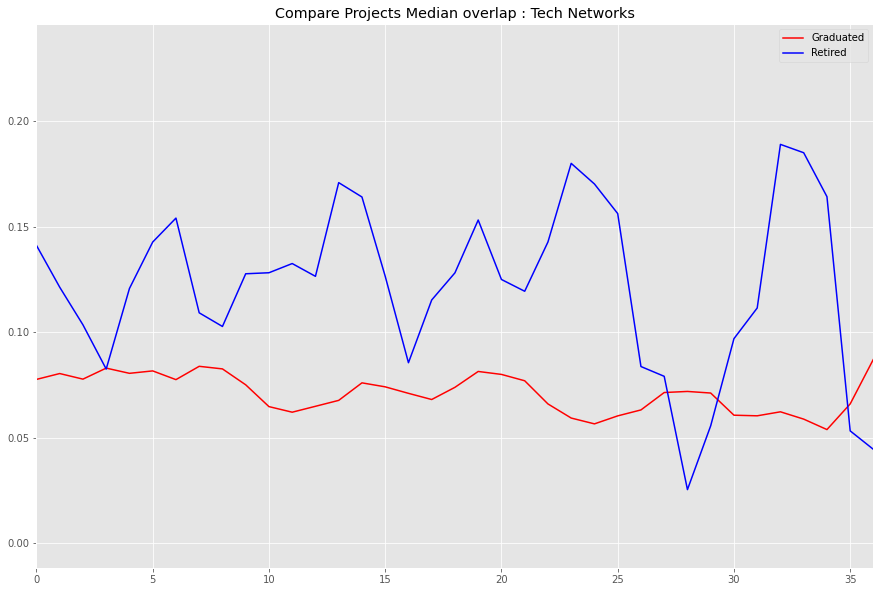

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [[] for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

all_g = list()
for x in all_graduated_name:
    if x in df_tech_overlaps.columns:
        all_g.append(x)
    elif x.lower() in df_tech_overlaps.columns:
        all_g.append(x.lower())


for col in all_g:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d1 = ave[:j]
from scipy.signal import savgol_filter
d1 = savgol_filter(ave[:j], 3, 1)

plt.plot(x,d1,color = 'r', label = "Graduated")

all_r = list()
for x in all_retired_name:
    if x in df_tech_overlaps.columns:
        all_r.append(x)
    elif x.lower() in df_tech_overlaps.columns:
        all_r.append(x.lower())

ave = [[] for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_r:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d2 = ave[:j]
from scipy.signal import savgol_filter
d2 = savgol_filter(ave[:j], 3, 1)

plt.plot(x,d2,color = 'b', label = 'Retired')
plt.title("Compare Projects Median overlap : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 36)

(0.0, 36.0)

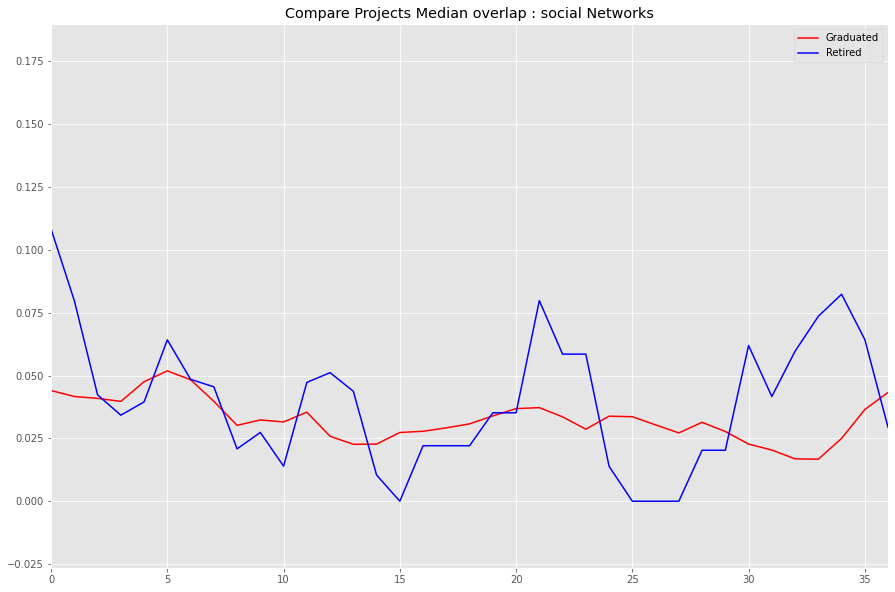

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [[] for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

all_g = list()
for x in all_graduated_name:
    if x in df_social_overlaps.columns:
        all_g.append(x)
    elif x.lower() in df_social_overlaps.columns:
        all_g.append(x.lower())


for col in all_g:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d1 = ave[:j]
from scipy.signal import savgol_filter
d1 = savgol_filter(ave[:j], 3, 1)

plt.plot(x,d1,color = 'r', label = "Graduated")

all_r = list()
for x in all_retired_name:
    if x in df_social_overlaps.columns:
        all_r.append(x)
    elif x.lower() in df_social_overlaps.columns:
        all_r.append(x.lower())

ave = [[] for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in all_r:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d2 = ave[:j]
from scipy.signal import savgol_filter
d2 = savgol_filter(ave[:j], 3, 1)

plt.plot(x,d2,color = 'b', label = 'Retired')
plt.title("Compare Projects Median overlap : social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 36)